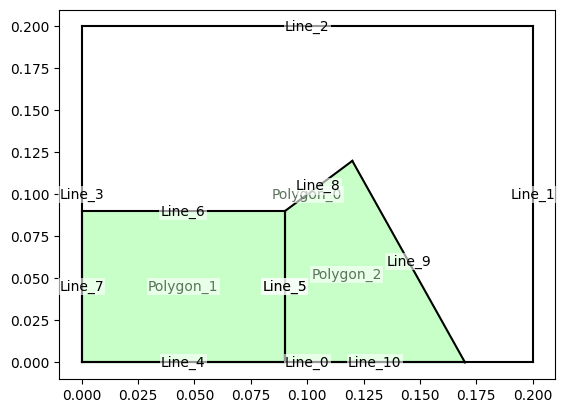

In [1]:
import matplotlib.pyplot as plt
import fluid_fvm.geometry as geo
import fluid_fvm.project as pr
import fluid_fvm.mesh as ms

a = geo.Assembly(base_polygon=geo.Polygon([geo.Vector(0,0),geo.Vector(0.2,0),geo.Vector(0.2,0.2), geo.Vector(0,0.2)]), 
                 polygon_list=[geo.Polygon([geo.Vector(0,0),geo.Vector(0.09,0),geo.Vector(0.09,0.09), geo.Vector(0,0.09)]),
                               geo.Polygon([geo.Vector(0.09, 0), geo.Vector(0.09,0.09),geo.Vector(0.12,0.12), geo.Vector(0.17,0)])])
a.assemble()
fig,ax = plt.subplots()
a.plot(ax, labels=True)
plt.show()

In [2]:
import numpy as np
idx = (1, 5)
asd = np.random.random((6,9))

asd[idx]

0.37373408000626107

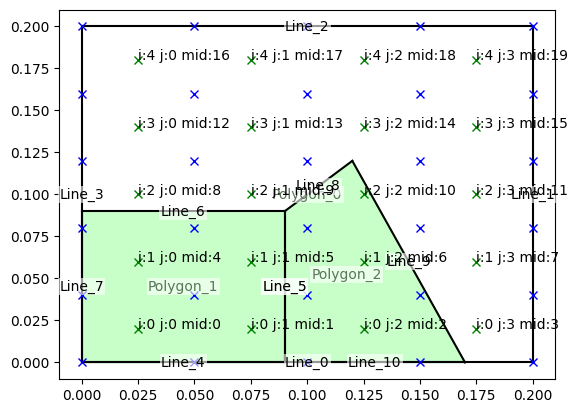

(0, 0)
(0, 1)
(0, 2)
(0, 3)
(1, 0)
(1, 1)
(1, 2)
(1, 3)
(2, 0)
(2, 1)
(2, 2)
(2, 3)
(3, 0)
(3, 1)
(3, 2)
(3, 3)
(4, 0)
(4, 1)
(4, 2)
(4, 3)


In [3]:
rec_m = ms.RectangularConfig(6,5)
rec_m.constructMesh(a.base_polygon)
fig,ax = plt.subplots()
a.plot(ax, labels=True)
rec_m.plotMesh(ax, vTexts=True)
plt.show()
for k in range(rec_m.getVolumeNodeNum()):
    ij = rec_m.math2geoVolume(k)
    k2 = rec_m.geo2mathVolume(ij)
    print(ij)
    assert(k2 == k)

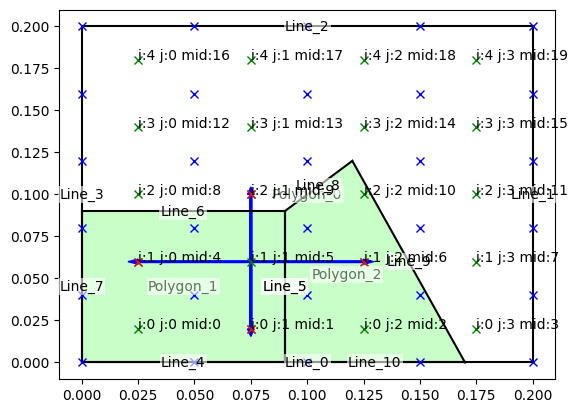

In [4]:
rec_m = ms.RectangularConfig(6,5,)
rec_m.constructMesh(a.base_polygon)
fig,ax = plt.subplots()
a.plot(ax, labels=True)
rec_m.plotMesh(ax, vTexts=True)
node = 5
for v in rec_m.getNeighbouringVolumes(node):
    if not v:
        continue
    print(rec_m.getVNode(v))
    rec_m.getVNode(v).plot(ax, fmt = "rx")

for v in rec_m.getNeigbouringVolumeVectors(node):
    if not v:
        continue
    v.plotAsVector(ax, vect_0=rec_m.getVNode(node), )
    
plt.show()

FACE

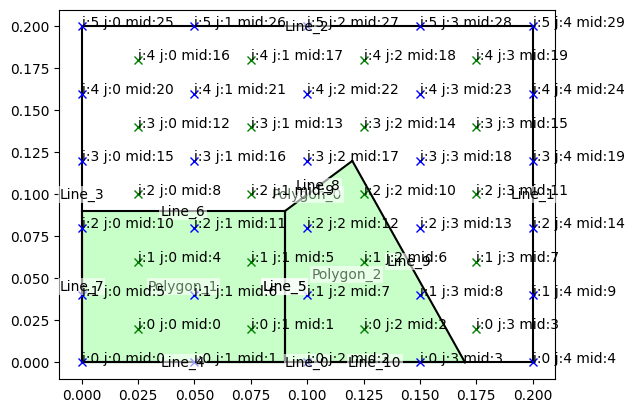

In [5]:
rec_m = ms.RectangularConfig(6,5,)
rec_m.constructMesh(a.base_polygon)
fig,ax = plt.subplots()
a.plot(ax, labels=True)
rec_m.plotMesh(ax, vTexts=True, fTexts=True)


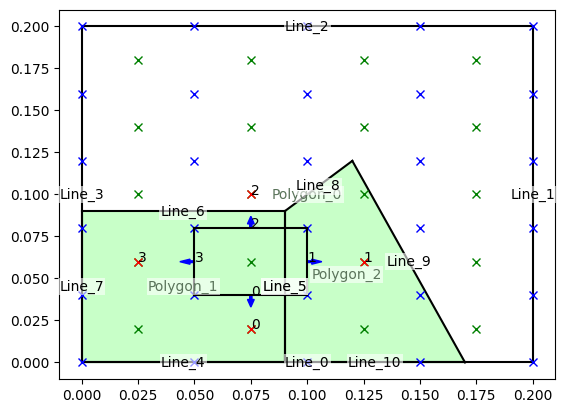

In [6]:
rec_m = ms.RectangularConfig(6,5,)
rec_m.constructMesh(a.base_polygon)
fig,ax = plt.subplots()
a.plot(ax, labels=True)
rec_m.plotMesh(ax, vTexts=False, fTexts=False)

for k in range(rec_m.getFaceNodeNum()):
    ij = rec_m.math2geoFace(k)
    k2 = rec_m.geo2mathFace(ij)
    #print(ij)
    assert(k2 == k)
selected_v=5
nf = rec_m.getNeighbouringFaceLines(selected_v)
for k in range(len(nf)):
    f = nf[k]

    
    ax.text(sum([f.p1.x, f.p2.x])/2, sum([f.p1.y, f.p2.y])/2, str(k))

    f.getNormal().plotAsVector(ax, vect_0=f.getCenter(), scale = 0.05)
    f.plot(ax)

for idx, v in enumerate(rec_m.getNeighbouringVolumes(selected_v)):
    if not v:
        continue
    rec_m.getVNode(v).plot(ax, fmt = "rx", text = str(idx))
#f_line = geo.Line(rec_m.getFNode(nf[0]), rec_m.getFNode(nf[1]))

plt.show()

In [7]:
print(rec_m.getAreaOfElement(5))
0.05*0.2/5

0.002


0.0020000000000000005

[<fluid_fvm.project.Material object at 0x00000261FF7E1600>, <fluid_fvm.project.Material object at 0x00000261FF7E0640>]


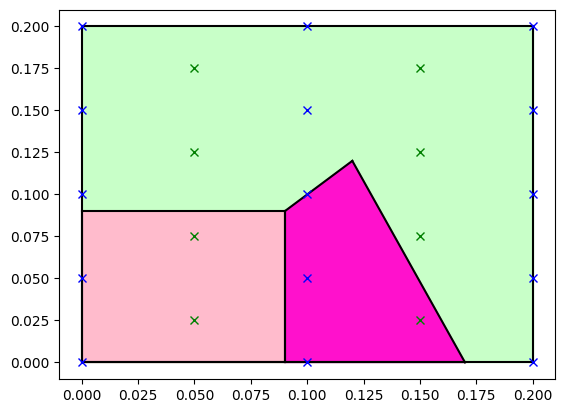

In [8]:
mat = pr.Material("test", lamb = 55, rho = 156, color = "#ffbbcc")
mat2 = pr.Material("test2", lamb = 556, rho = 1056, color = "#ff11cc")

comp = pr.Component()

comp.setAssembly(a)
comp.assignMaterial("Polygon_1", mat)
comp.assignMaterial("Polygon_2", mat2)
print(comp.materials)

mesh_c = ms.RectangularConfig(5,3)
comp.setMesh(mesh_c)

fig, ax = plt.subplots()
comp.plot(ax, mesh=True)

0 neighbour vetor: 0.0 y -0.05000000000000001
1 neighbour vetor: 0.04999999999999999 y -0.0
2 neighbour vetor: 0.0 y 0.09999999999999999
3 neighbour vetor: -0.10000000000000002 y 0.0


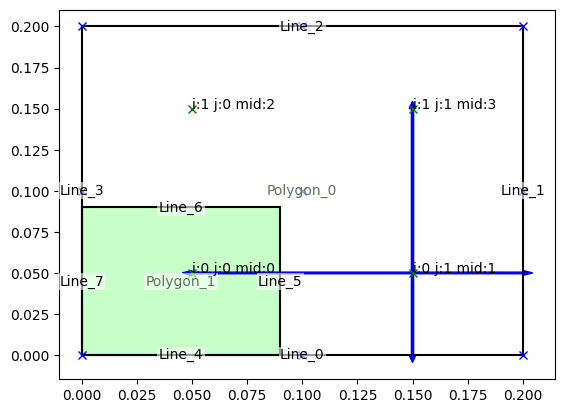

In [9]:
a = geo.Assembly(base_polygon=geo.Polygon([geo.Vector(0,0),geo.Vector(0.2,0),geo.Vector(0.2,0.2), geo.Vector(0,0.2)]), 
                 polygon_list=[geo.Polygon([geo.Vector(0,0),geo.Vector(0.09,0),geo.Vector(0.09,0.09), geo.Vector(0,0.09)])])
a.assemble()

mat = pr.Material("test", gamma = 1, rho = 156, color = "#ffbbcc")
mat2 = pr.Material("test2", gamma = 1, rho = 1056, color = "#ff11cc")

comp = pr.Component()

comp.setAssembly(a)
comp.assignMaterial("Polygon_0", mat)
comp.assignMaterial("Polygon_1", mat2)


mesh_c = ms.RectangularConfig(3,3)
comp.setMesh(mesh_c)

fig, ax = plt.subplots()
#comp.setPhysics(c)

#lines = mesh_c.getNeighbouringFaceLines(node)



comp.assembly.plot(ax, labels = True)
mesh_c.plotMesh(ax, vTexts=True)

selected_v=1
nf = mesh_c.getNeighbouringFaceLines(selected_v)
nv= mesh_c.getNeigbouringVolumeVectors(selected_v)

for k in range(len(nf)):
    f = nf[k]
    v = nv[k]

    v.plotAsVector(ax, vect_0=mesh_c.getVNode(selected_v), scale = 1)
    print(str(k)+" neighbour vetor: "+str(v.x)+ " y "+str(v.y))
